In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
import random 
import seaborn as sns

In [25]:
#Decided to use erdos_renyi random graph
def erdos_renyi(G, p):
    for i in G.nodes():
        for j in G.nodes():
            if i != j:
                r = random.random()
                if r <= p:
                    G.add_edge(i, j)
                    ne = [(i, j)]
                    #display_graph(G, '', ne)
                else:
                    ne = []
                    #display_graph (G, '', ne)
                    continue
    return G               

In [65]:
n = 100  #nodes
p = 0.03 #probability 

G = nx.Graph()
G.add_nodes_from([i for i in range(n)])
erdos_renyi(G, p)

In [66]:
#Find degree_centrality for the whole graph
degree_centrality = nx.degree_centrality(erdos_renyi(G, p))

#Find 6 nodes with largest degree_centrality
N = 6
res = dict(sorted(degree_centrality.items(), key = itemgetter(1), reverse = True)[:N])
print(res)

#Find thier(6 nodes with largest degree_centrality) degree //Should be 18, 18, 17, 17, 16, 14
[{values: G.degree[values]} for values in res]

{23: 0.20202020202020204, 18: 0.18181818181818182, 34: 0.18181818181818182, 41: 0.17171717171717174, 83: 0.17171717171717174, 44: 0.16161616161616163}


[{23: 20}, {18: 18}, {34: 18}, {41: 17}, {83: 17}, {44: 16}]

In [70]:
#Find edge betweenness for the final network
edge_betweenness = nx.edge_betweenness_centrality(G, normalized=True) 
edge_betweenness

{(0, 33): 0.0037318134838305594,
 (0, 77): 0.003121969299990935,
 (0, 93): 0.0049829791420700495,
 (0, 14): 0.00434737767180141,
 (0, 18): 0.004781220541104004,
 (0, 22): 0.005389375579093191,
 (0, 56): 0.004363788903656624,
 (0, 42): 0.004818955125905163,
 (0, 28): 0.003761155210024711,
 (0, 51): 0.0035273399949056774,
 (0, 59): 0.00389940199345397,
 (0, 70): 0.00333462482546029,
 (1, 81): 0.00322167485955827,
 (1, 91): 0.002977923151277369,
 (1, 86): 0.0038826711857758143,
 (1, 96): 0.00467571926716305,
 (1, 17): 0.00337814219184513,
 (1, 18): 0.0042244765324883395,
 (1, 41): 0.004069981798982437,
 (1, 61): 0.0032045056939729874,
 (1, 64): 0.003077016840537429,
 (1, 90): 0.0033774079415273962,
 (1, 98): 0.003661278255818013,
 (1, 3): 0.002621690621790559,
 (1, 83): 0.0037090443842953463,
 (2, 18): 0.004298226056983711,
 (2, 34): 0.00396938449368887,
 (2, 88): 0.0027470723479082935,
 (2, 20): 0.003369534969576527,
 (2, 74): 0.003249205852651808,
 (2, 87): 0.0031636907364518147,
 (2, 7

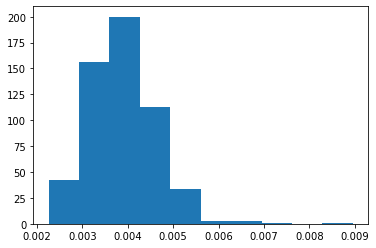

In [86]:
#Hist of edge betweenness
plt.hist(list(edge_betweenness.values()));

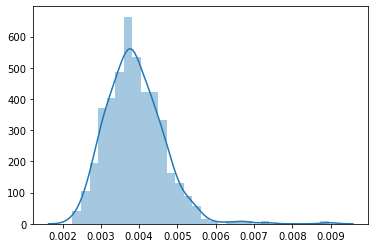

In [87]:
sns.distplot(list(edge_betweenness.values()));

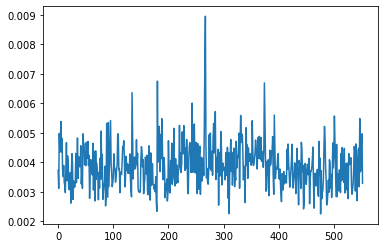

In [81]:
plt.plot(list(edge_betweenness.values()));

In [88]:
#Another attempt

In [94]:
n = 100
m = 500
vv=0
nn=0
net = nx.Graph()
for i in range(n):
    net.add_node(i)
nodes = list(net.nodes())
edges_number = 0
while True:
    if edges_number == 100:
        break
    a = random.choice(nodes)
    b = random.choice(nodes)
    if a != b and not net.has_edge(a,b):
        vv += 1
        net.add_edge(a,b)
        edges_number += 1
    else:
        nn += 1



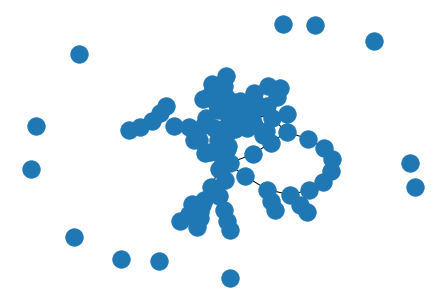

In [96]:
nx.draw(net)

In [101]:
centralties = sorted((index * (n-1), node)
       for node,index in nx.degree_centrality(net).items())

edges = [t for t in net.edges()]

In [102]:
target_centralites = [18, 18, 17, 17, 16, 14]

In [110]:
l = len(centralties) - 1
bl = [centralties[l-i][1] for i in range(5)]

def rewire(network, edge, node):
    network.remove_edge(edge[0],edge[1])
    network.add_edge(node, edge[0])

In [111]:
i = 0
n = len(centralties) - 1
node = centralties[n][1]
while True:
    if centralties[n][0] >= target_centralites[i]:
        break
    ed = random.choice(edges)
    if ed[0] not in bl and ed[1] not in bl:
        rewire(net, ed,node)
        centralties = sorted((indeg * (n-1), node)
           for node,indeg in nx.degree_centrality(net).items())
        edges = [t for t in net.edges()]

In [ ]:
for i in range(len(target_centralites)):
    n = len(centralties) - i - 1
    node = centralties[n][1]
    while True:
        if centralties[n][0] >= target_centralites[i]:
            break
        ed = random.choice(edges)
        if ed[0] not in bl and ed[1] not in bl:
            rewire(net, ed,node)
            centralties = sorted((indeg * (n-1), node)
               for node,indeg in nx.degree_centrality(net).items())
            edges = [t for t in net.edges()]

In [ ]:
degrees = net.degree()

l = []

for i in Degree:
    l.append(i[1])

_ = plt.hist(l)